In [45]:
import numpy as np
import matplotlib.pyplot as plt

from kernel.fun import KernelFun

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# interpolate and plot <a name="interpolate_and_plot"></a>

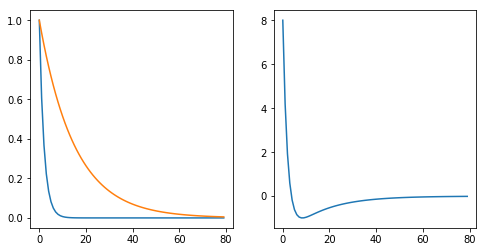

In [46]:
def exponential(t, tau):
    return np.exp(-t / tau)

ker = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), support=[0, 80], coefs=[10, -2])

t = np.arange(0, 80, 1)
y = ker.interpolate(t)
basis = ker.interpolate_basis(t)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.plot(t, basis, '-')
ax2.plot(t, y, '-')

# convolve_continuous

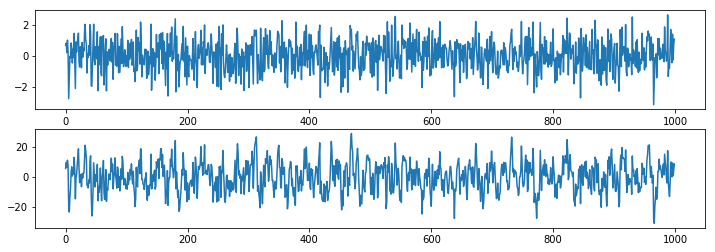

In [47]:
t = np.arange(0, 1000, 1)
signal = np.random.randn(len(t))

convolved_signal = ker.convolve_continuous(t, signal)

fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), nrows=2)
ax1.plot(t, signal)
ax2.plot(t, convolved_signal)

In [62]:
def exponential(t, tau, t0=0):
    return np.exp(-(t - t0) / tau)

taus = [2, 15]

# ker = KernelFun(exponential, basis_kwargs=dict(tau=taus), shared_kwargs=dict(t0=0), support=[0, 60], coefs=[1, 1])
# ker = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), shared_kwargs=dict(t0=-10), support=[-10, 50], coefs=[10, -2])
ker = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), shared_kwargs=dict(t0=10), support=[10, 70], coefs=[10, -2])

t_ = np.arange(-20, 100, 1)
y = ker.interpolate(t)
basis = ker.interpolate_basis(t)

t = np.arange(0, 100, 1)
signal = np.random.randn(len(t))

convolved_signal = ker.convolve_continuous(t, signal)
y_basis = ker.convolve_basis_continuous(t, signal)
# convolved_signal_left = ker_left.convolve_continuous(t, signal)
# convolved_signal_right = ker_right.convolve_continuous(t, signal)

for ii in range(2):
    _ker = KernelFun(exponential, basis_kwargs=dict(tau=[taus[ii]]), shared_kwargs=dict(t0=0), support=ker.suppoer, coefs=[1])
    _y = _ker.convolve_continuous(t, signal)
    assert np.allclose(y_basis[:, ii], _y)
    
# fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), nrows=2)
# ax1.plot(t, signal)
# ax2.plot(t, convolved_signal)

AssertionError: 

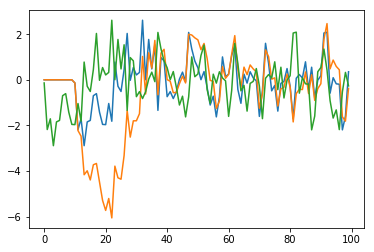

In [63]:
plt.plot(y_basis)
plt.plot(_y)

In [4]:
def exponential(t, tau, t0=0):
    return np.exp(-(t - t0) / tau)


ker = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), shared_kwargs=dict(t0=0), support=[0, 60], coefs=[10, -2])
ker_left = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), shared_kwargs=dict(t0=-10), support=[-10, 50], coefs=[10, -2])
ker_right = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), shared_kwargs=dict(t0=10), support=[10, 70], coefs=[10, -2])

t_ = np.arange(-20, 100, 1)
y = ker.interpolate(t)
basis = ker.interpolate_basis(t)

t = np.arange(0, 100, 1)
signal = np.random.randn(len(t))

convolved_signal = ker.convolve_continuous(t, signal)
convolved_signal_left = ker_left.convolve_continuous(t, signal)
convolved_signal_right = ker_right.convolve_continuous(t, signal)

# fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), nrows=2)
# ax1.plot(t, signal)
# ax2.plot(t, convolved_signal)

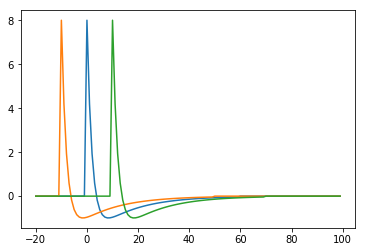

In [5]:
plt.plot(t_, ker.interpolate(t_))
plt.plot(t_, ker_left.interpolate(t_))
plt.plot(t_, ker_right.interpolate(t_))

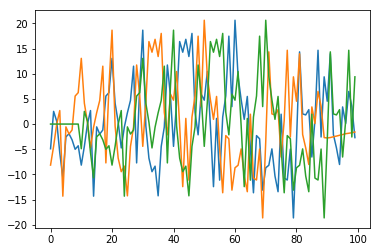

In [6]:
plt.plot(t, convolved_signal)
plt.plot(t, convolved_signal_left)
plt.plot(t, convolved_signal_right)

In [19]:
np.allclose(convolved_signal[:-10], convolved_signal_right[10:]), np.allclose(convolved_signal[10:], convolved_signal_left[:-10])

(True, True)

In [8]:
convolved_signal_right

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -4.90210544,   2.51993688,
         0.58444733,  -5.69363247, -10.67437509,  -2.5461481 ,
        -1.92220028,  -3.13213227,  -5.01518977,  -4.31491822,
        -8.15328009,  -4.41130448,  -0.02772665,   2.68143477,
       -14.32574707,  -0.55814867,  -1.98318784,  -1.18132127,
         5.56571314,   6.23971398,  13.05563524,   4.14277633,
         0.37054558,  -4.74349607,  -0.61283128,   2.24643695,
         4.69530948,  11.49989816,  -7.71640429,   7.46350094,
        18.65445288,  -0.38286023,  -6.77146672,  -9.45950556,
        -8.36285412, -14.25813711,  -4.44112686,  -0.5956268 ,
        11.73358586,   5.63920722,  -4.4270395 ,   4.36509102,
        16.39202111,  14.27425983,  16.83652356,  13.41926445,
        18.00842238,   2.34753142,  -2.13872607,   5.95660718,
         4.74507873,  10.43667412,  -0.34998381, -12.43

In [9]:
convolved_signal

array([ -4.90210544,   2.51993688,   0.58444733,  -5.69363247,
       -10.67437509,  -2.5461481 ,  -1.92220028,  -3.13213227,
        -5.01518977,  -4.31491822,  -8.15328009,  -4.41130448,
        -0.02772665,   2.68143477, -14.32574707,  -0.55814867,
        -1.98318784,  -1.18132127,   5.56571314,   6.23971398,
        13.05563524,   4.14277633,   0.37054558,  -4.74349607,
        -0.61283128,   2.24643695,   4.69530948,  11.49989816,
        -7.71640429,   7.46350094,  18.65445288,  -0.38286023,
        -6.77146672,  -9.45950556,  -8.36285412, -14.25813711,
        -4.44112686,  -0.5956268 ,  11.73358586,   5.63920722,
        -4.4270395 ,   4.36509102,  16.39202111,  14.27425983,
        16.83652356,  13.41926445,  18.00842238,   2.34753142,
        -2.13872607,   5.95660718,   4.74507873,  10.43667412,
        -0.34998381, -12.43446347,   1.12295105, -11.14150612,
         1.38891177,   5.59627553,  17.46323988,   3.47178506,
        20.62578504,   9.47355235,   4.84777745,   0.93

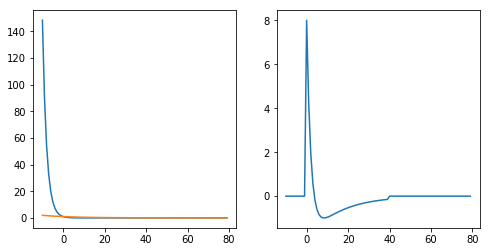

In [10]:
def exponential(t, tau):
    return np.exp(-t / tau)

ker = KernelFun(exponential, basis_kwargs=dict(tau=[2, 15]), support=[0, 40], coefs=[10, -2])

t = np.arange(-10, 80, 1)
y = ker.interpolate(t)
basis = ker.interpolate_basis(t)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.plot(t, basis, '-')
ax2.plot(t, y, '-')

In [11]:
from kernel.utils import searchsorted

arg0, argf = searchsorted(t, ker.support)

In [12]:
y[argf]

0.0

In [13]:
np.isclose(0, 0)

True

In [14]:
arg0

10

In [15]:
argf

50

In [16]:
len(t)

90

In [17]:
np.searchsorted(t, ker.support[1])

50

In [18]:
ker.support[1]

40